# Correlation Scatter Plot + Box and Whisker plots for mean correlations and degree centrality
### Aim:
Plot a scatter plot of mean pearson correlation and degree centrality
Plot box and whisker data distributions of pearson + degree centrality data

### Output:
Scatter plot of pearson correlation vs. degree centrality
Box and whisker of pearsons correlation + degree centrality data distributions

In [1]:
# Import packages and DepMap tools
import os
import pandas as pd
from DepMapTools.DataImport import SaveLoad
from DepMapTools.Networks import CentralityAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Instantiate Classes
sl = SaveLoad()
ca = CentralityAnalysis()

In [3]:
# Define dictionary paths
PRD = ".."
net_path = os.path.join(PRD,
                        '1_SingleGene_Analysis/pickle_files/chronos_singlegene_495.pickle')

# Load network and community analysis dictionaries
net_dict = sl.load_dict_pickle(net_path)

In [4]:
# Get mean correlations
mean_corr = []
for key in net_dict:
    mean = net_dict[key]['Correlation'][f'{key}_Pearson_R'].mean()
    mean_corr.append(mean)

In [5]:
# Get degree centrality
gene_cent = []
for key in net_dict:
    g = net_dict[key]['Network']
    dc = ca.degree_centrality(g)
    gene_cent.append(dc[key])

In [6]:
# Create DF
dict1 = {'Correlation':mean_corr, 'Degree_Centrality':gene_cent}
df = pd.DataFrame(dict1)

In [8]:
p, r = stats.pearsonr(mean_corr, gene_cent)
p

-0.05258147345526622

Saving figure pearson_correlation_degree_cent


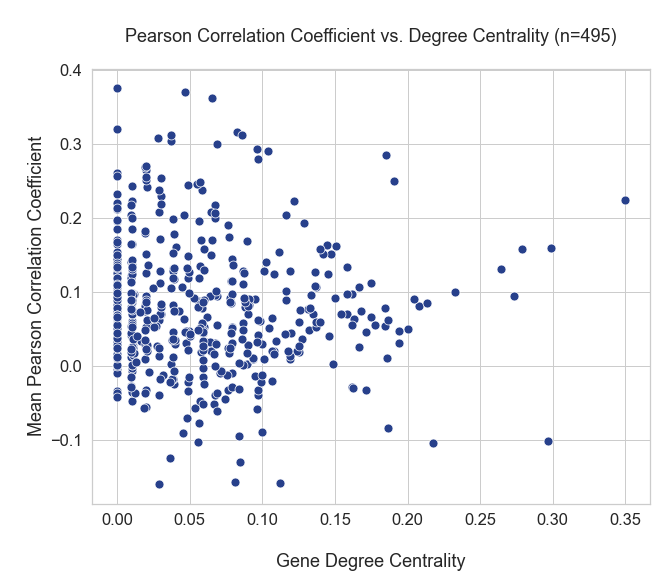

In [11]:
# Plot a scatterplot of the results
sns.set(rc={'figure.figsize':(10,8)}, style='whitegrid', font_scale=1.5)
ax = sns.scatterplot(x='Degree_Centrality', y="Correlation", data=df, color='#27408B', sizes=(30,450), s=80)
ax.set_title('\nPearson Correlation Coefficient vs. Degree Centrality (n=495)\n')
ax.set(xlabel='\nGene Degree Centrality', ylabel='\nMean Pearson Correlation Coefficient')
sl.save_fig('pearson_correlation_degree_cent')
plt.show()

In [13]:
# Define DFs to plot
cor_df = pd.DataFrame(mean_corr, columns=['Mean_Corr']).assign(Analysis='correlation')
cen_df = pd.DataFrame(gene_cent, columns=['Degree']).assign(Analysis='degree')

Saving figure correlation_v_deg


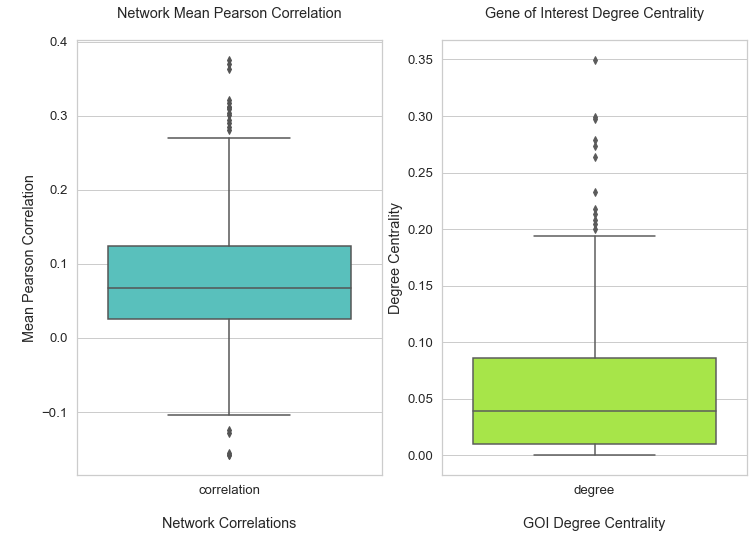

In [17]:
# Plot results
sns.set(rc={'figure.figsize':(12,8)}, style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(1,2)
sns.boxplot(ax=ax[0], x="Analysis", y="Mean_Corr", data=cor_df, color='#48D1CC')
ax[0].set_title('Network Mean Pearson Correlation\n')
ax[0].set(xlabel='\nNetwork Correlations', ylabel='\nMean Pearson Correlation')

sns.boxplot(ax=ax[1], x="Analysis", y="Degree", data=cen_df, color='#ADFF2F')
ax[1].set_title('Gene of Interest Degree Centrality\n')
ax[1].set(xlabel='\nGOI Degree Centrality', ylabel='\nDegree Centrality')
sl.save_fig('correlation_v_deg')
plt.show()